In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [88]:
df = pd.read_csv("sonatel_bilan.csv")

df1 = df.set_index("elements").T

In [89]:
X = pd.DataFrame(df1["annee"])

In [90]:
y = pd.DataFrame(df1["total capitaux propres"])

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [93]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly = train_test_split(X_poly, test_size=0.2, random_state=42)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

In [94]:
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

C:\Users\diass\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [95]:
models = {
    'Régression Linéaire': y_pred_linear,
    'Régression Polynomiale': y_pred_poly,
    'Forêt Aléatoire': y_pred_rf
}

In [96]:
metrics = {}
for name, y_pred in models.items():
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    metrics[name] = {
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    }

In [97]:
metrics_df = pd.DataFrame(metrics).T
print(metrics_df)

                                RMSE           MAE        R²
Régression Linéaire     19838.776782  19273.393123  0.988315
Régression Polynomiale  46235.199281  30806.219956  0.936534
Forêt Aléatoire         25752.790772  20621.528000  0.980310


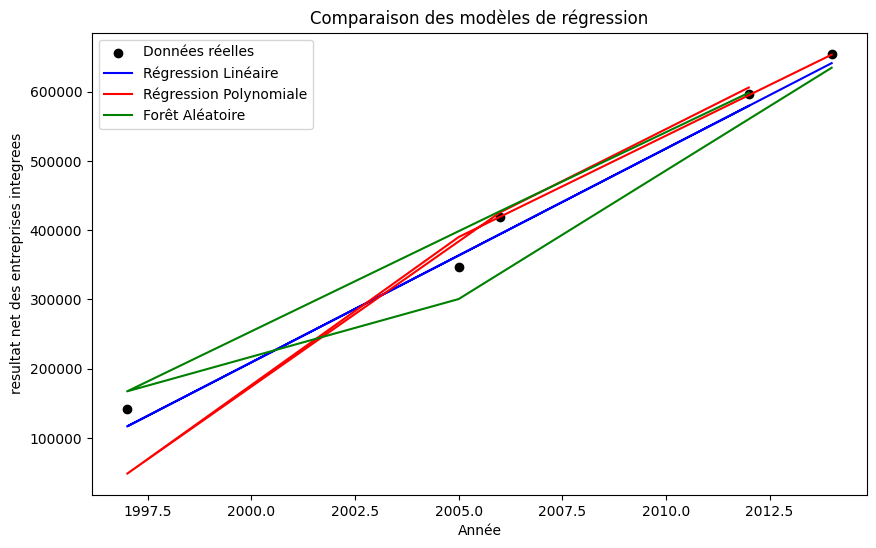

In [98]:
# Optionnel: Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black', label='Données réelles')
plt.plot(X_test, y_pred_linear, label='Régression Linéaire', color='blue')
plt.plot(X_test, y_pred_poly, label='Régression Polynomiale', color='red')
plt.plot(X_test, y_pred_rf, label='Forêt Aléatoire', color='green')
plt.legend()
plt.xlabel('Année')
plt.ylabel('resultat net des entreprises integrees')
plt.title('Comparaison des modèles de régression')
plt.show()